# Classification after Feature Engineering

In [ ]:
import numpy as np
import pandas as pd
pd.pandas.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.cm as cm

#### Loading the Feature Engineered 2022 and 2023 data's

In [ ]:
dataset_2022 = pd.read_csv('data_2022_feature_engineered.csv' )
dataset_2023 = pd.read_csv('data_2023_feature_engineered.csv' )
dataset_2023

,CATAG7,HEALTH,EDUHIGHCAT,IRSEX,NEWRACE2,BOOKED,COCAGE,CRKAGE,ECSTMOAGE,HALLUCAGE,HERAGE,METHAMAGE,MJAGE,PNRNMAGE,SEDNMAGE,STMNMAGE,TRQNMAGE,AMIPY,IRAMDEYR,SPDPSTMON,KRATOMFLAG,KRATOMYR,CRKYR,UD5CNSANY,UD5ILALANY,UD5ILLANY,UD5OPIANY,UD5TRQSDANY,SVYROPIANY,SVYRPSYANY,SVYRSUDANY,CCDAYPYR,CRKYDAYS,METHNDAYYR,INHNDAYYR,HALLNDAYYR,HERYDAYS,MRJYDAYS,COCYDAYS,IRPYUD5ALC,MJYRTOT,COCYR,HERYR,METHAMYR,INHALYR,PNRNMYR,MRJYR,HALLUCYR,TRQNMYR,STMNMYR,SEDNMYR,LSDYR,OPIANYYR,SUTINPPY,SUTOUTALCPY,SUTOUTCOCPY,SUTOUTHALPY,SUTOUTHERPY,SUTOUTMRJPY,SUTOUTMTHPY,SUTOUTOPIPY,SUTOUTPNRPY,SUTOUTPPY,SUTOUTSEDPY,SUTOUTSTMPY,SUTOUTTQSDPY,SUTOUTTRQPY,SUTRTPY,SUTOUTDRGPY,SUTRTDRGPY,SUTRTALCPY,IRSUTINRHAB,IRSUTINHOSP,IRSUTOUTRHAB,IRSUTRXALC,IRSUTRXDRG,MRJMON,COCMON,HERMON,HALLUCMON,INHALMON,METHAMMON,PNRNMMON,TRQNMMON,STMNMMON,SEDNMMON,LSDMON,OPINMMON,CRKMON,KRATOMMON,RECEIVED_TREATMENT,USE_SUBSTANCE_LASTMONTH,RELAPSE_SCORE,RELAPSE_CLASS
0,7.0,2.0,3.0,1.0,7.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.107584,0
1,7.0,2.0,2.0,1.0,1.0,2.0,20.0,991.0,23.0,21.0,991.0,991.0,17.0,993.0,993.0,993.0,993.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,993.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.067516,0
2,7.0,3.0,2.0,2.0,4.0,1.0,991.0,991.0,991.0,991.0,991.0,20.0,991.0,991.0,991.0,991.0,991.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,4.0,3.0,991.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.957290,1
3,7.0,1.0,4.0,1.0,6.0,1.0,991.0,991.0,991.0,15.0,991.0,991.0,15.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.040822,0
4,4.0,3.0,2.0,1.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.123989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50326,7.0,4.0,1.0,2.0,7.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.132005,0
50327,7.0,2.0,3.0,2.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [18]:

# treatment variables
treatment_vars = [
        "SUTINPPY",
        "SUTOUTALCPY",
        "SUTOUTCOCPY",
        "SUTOUTHALPY",
        "SUTOUTHERPY",
        "SUTOUTMRJPY",
        "SUTOUTMTHPY",
        "SUTOUTOPIPY",
        "SUTOUTPNRPY",
        "SUTOUTPPY",
        "SUTOUTSEDPY",
        "SUTOUTSTMPY",
        "SUTOUTTQSDPY",
        "SUTOUTTRQPY",
        "SUTRTPY",
        "SUTOUTDRGPY",
        "SUTRTDRGPY",
        "SUTRTALCPY",
        "IRSUTINRHAB",
        "IRSUTINHOSP",
        "IRSUTOUTRHAB",
        "IRSUTRXALC",
        "IRSUTRXDRG"
    ]

past_month_use_vars = [
        'MRJMON', 'COCMON', 'CRKMON', 'HERMON',
        'HALLUCMON', 'INHALMON', 'METHAMMON', 'PNRNMMON', 'TRQNMMON',
        'STMNMMON', 'SEDNMMON', 'LSDMON', 'KRATOMMON','OPINMMON'
    ]


In [19]:
# combining 2022 and 2023

dataset_2022['YEAR'] = 2022
dataset_2023['YEAR'] = 2023

combined_data = pd.concat([dataset_2023, dataset_2022], ignore_index=True)
combined_data

,CATAG7,HEALTH,EDUHIGHCAT,IRSEX,NEWRACE2,BOOKED,COCAGE,CRKAGE,ECSTMOAGE,HALLUCAGE,HERAGE,METHAMAGE,MJAGE,PNRNMAGE,SEDNMAGE,STMNMAGE,TRQNMAGE,AMIPY,IRAMDEYR,SPDPSTMON,KRATOMFLAG,KRATOMYR,CRKYR,UD5CNSANY,UD5ILALANY,UD5ILLANY,UD5OPIANY,UD5TRQSDANY,SVYROPIANY,SVYRPSYANY,SVYRSUDANY,CCDAYPYR,CRKYDAYS,METHNDAYYR,INHNDAYYR,HALLNDAYYR,HERYDAYS,MRJYDAYS,COCYDAYS,IRPYUD5ALC,MJYRTOT,COCYR,HERYR,METHAMYR,INHALYR,PNRNMYR,MRJYR,HALLUCYR,TRQNMYR,STMNMYR,SEDNMYR,LSDYR,OPIANYYR,SUTINPPY,SUTOUTALCPY,SUTOUTCOCPY,SUTOUTHALPY,SUTOUTHERPY,SUTOUTMRJPY,SUTOUTMTHPY,SUTOUTOPIPY,SUTOUTPNRPY,SUTOUTPPY,SUTOUTSEDPY,SUTOUTSTMPY,SUTOUTTQSDPY,SUTOUTTRQPY,SUTRTPY,SUTOUTDRGPY,SUTRTDRGPY,SUTRTALCPY,IRSUTINRHAB,IRSUTINHOSP,IRSUTOUTRHAB,IRSUTRXALC,IRSUTRXDRG,MRJMON,COCMON,HERMON,HALLUCMON,INHALMON,METHAMMON,PNRNMMON,TRQNMMON,STMNMMON,SEDNMMON,LSDMON,OPINMMON,CRKMON,KRATOMMON,RECEIVED_TREATMENT,USE_SUBSTANCE_LASTMONTH,RELAPSE_SCORE,RELAPSE_CLASS,YEAR
0,7.0,2.0,3.0,1.0,7.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.107584,0,2023
1,7.0,2.0,2.0,1.0,1.0,2.0,20.0,991.0,23.0,21.0,991.0,991.0,17.0,993.0,993.0,993.0,993.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,993.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.067516,0,2023
2,7.0,3.0,2.0,2.0,4.0,1.0,991.0,991.0,991.0,991.0,991.0,20.0,991.0,991.0,991.0,991.0,991.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,4.0,3.0,991.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.957290,1,2023
3,7.0,1.0,4.0,1.0,6.0,1.0,991.0,991.0,991.0,15.0,991.0,991.0,15.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.040822,0,2023
4,4.0,3.0,2.0,1.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.123989,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,7.0,4.0,4.0,2.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.103197,0,2022
102493,7.0,3.0,2.0,1.0,2.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
combined_data.to_csv('data_combined_feature_engineered.csv',index=False)

In [37]:
combined_data

,CATAG7,HEALTH,EDUHIGHCAT,IRSEX,NEWRACE2,BOOKED,COCAGE,CRKAGE,ECSTMOAGE,HALLUCAGE,HERAGE,METHAMAGE,MJAGE,PNRNMAGE,SEDNMAGE,STMNMAGE,TRQNMAGE,AMIPY,IRAMDEYR,SPDPSTMON,KRATOMFLAG,KRATOMYR,CRKYR,UD5CNSANY,UD5ILALANY,UD5ILLANY,UD5OPIANY,UD5TRQSDANY,SVYROPIANY,SVYRPSYANY,SVYRSUDANY,CCDAYPYR,CRKYDAYS,METHNDAYYR,INHNDAYYR,HALLNDAYYR,HERYDAYS,MRJYDAYS,COCYDAYS,IRPYUD5ALC,MJYRTOT,COCYR,HERYR,METHAMYR,INHALYR,PNRNMYR,MRJYR,HALLUCYR,TRQNMYR,STMNMYR,SEDNMYR,LSDYR,OPIANYYR,SUTINPPY,SUTOUTALCPY,SUTOUTCOCPY,SUTOUTHALPY,SUTOUTHERPY,SUTOUTMRJPY,SUTOUTMTHPY,SUTOUTOPIPY,SUTOUTPNRPY,SUTOUTPPY,SUTOUTSEDPY,SUTOUTSTMPY,SUTOUTTQSDPY,SUTOUTTRQPY,SUTRTPY,SUTOUTDRGPY,SUTRTDRGPY,SUTRTALCPY,IRSUTINRHAB,IRSUTINHOSP,IRSUTOUTRHAB,IRSUTRXALC,IRSUTRXDRG,MRJMON,COCMON,HERMON,HALLUCMON,INHALMON,METHAMMON,PNRNMMON,TRQNMMON,STMNMMON,SEDNMMON,LSDMON,OPINMMON,CRKMON,KRATOMMON,RECEIVED_TREATMENT,USE_SUBSTANCE_LASTMONTH,RELAPSE_SCORE,RELAPSE_CLASS,YEAR
0,7.0,2.0,3.0,1.0,7.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.107584,0,2023
1,7.0,2.0,2.0,1.0,1.0,2.0,20.0,991.0,23.0,21.0,991.0,991.0,17.0,993.0,993.0,993.0,993.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,993.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.067516,0,2023
2,7.0,3.0,2.0,2.0,4.0,1.0,991.0,991.0,991.0,991.0,991.0,20.0,991.0,991.0,991.0,991.0,991.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,4.0,3.0,991.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.957290,1,2023
3,7.0,1.0,4.0,1.0,6.0,1.0,991.0,991.0,991.0,15.0,991.0,991.0,15.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.040822,0,2023
4,4.0,3.0,2.0,1.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.123989,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,7.0,4.0,4.0,2.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.103197,0,2022
102493,7.0,3.0,2.0,1.0,2.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
# features to drop before training

target_leak_features = treatment_vars + past_month_use_vars 
other_feat = ['USE_SUBSTANCE_LASTMONTH', 'RECEIVED_TREATMENT', 'RELAPSE_SCORE', 'RELAPSE_CLASS','YEAR']

# creating the input feature only 
input_feat_data = combined_data.drop(columns=target_leak_features+other_feat, axis=1)

# creating the targt
target_data= combined_data['RELAPSE_CLASS']
target_data.value_counts()

RELAPSE_CLASS
0    82568
1    19929
Name: count, dtype: int64

In [23]:
input_feat_data

,CATAG7,HEALTH,EDUHIGHCAT,IRSEX,NEWRACE2,BOOKED,COCAGE,CRKAGE,ECSTMOAGE,HALLUCAGE,HERAGE,METHAMAGE,MJAGE,PNRNMAGE,SEDNMAGE,STMNMAGE,TRQNMAGE,AMIPY,IRAMDEYR,SPDPSTMON,KRATOMFLAG,KRATOMYR,CRKYR,UD5CNSANY,UD5ILALANY,UD5ILLANY,UD5OPIANY,UD5TRQSDANY,SVYROPIANY,SVYRPSYANY,SVYRSUDANY,CCDAYPYR,CRKYDAYS,METHNDAYYR,INHNDAYYR,HALLNDAYYR,HERYDAYS,MRJYDAYS,COCYDAYS,IRPYUD5ALC,MJYRTOT,COCYR,HERYR,METHAMYR,INHALYR,PNRNMYR,MRJYR,HALLUCYR,TRQNMYR,STMNMYR,SEDNMYR,LSDYR,OPIANYYR
0,7.0,2.0,3.0,1.0,7.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,2.0,2.0,1.0,1.0,2.0,20.0,991.0,23.0,21.0,991.0,991.0,17.0,993.0,993.0,993.0,993.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,993.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,3.0,2.0,2.0,4.0,1.0,991.0,991.0,991.0,991.0,991.0,20.0,991.0,991.0,991.0,991.0,991.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,4.0,3.0,991.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,1.0,4.0,1.0,6.0,1.0,991.0,991.0,991.0,15.0,991.0,991.0,15.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,2.0,1.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,7.0,4.0,4.0,2.0,1.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
102493,7.0,3.0,2.0,1.0,2.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102494,6.0,2.0,2.0,2.0,2.0,1.0,991.0,991.0,21.0,21.0,991.0,991.0,18.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102495,6.0,2.0,2.0,2.0,4.0,2.0,991.0,991.0,991.0,991.0,991.0,991.0,15.0,991.0,991.0,991.0,991.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,991.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# scaling the data 

def standardscaling(data):
    original_data = data.copy()
    # numerical_data = data.select_dtypes(include=['float64', 'int64'])  # all data are numerical at the moment
    scaler = StandardScaler()
    scaled_numerical_data = scaler.fit_transform(data)
    scaled_data = pd.DataFrame(scaled_numerical_data, columns=original_data.columns)
    return scaled_data

input_feat_data_scaled = standardscaling(input_feat_data)


In [ ]:
##### ------ Ready to train a Model ------
# from here you can train your own model or refer the following model and fine tune

### Modeling

In [ ]:
# defining the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


# train/test split based on the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(input_feat_data_scaled, target_data, test_size=0.2, random_state=42, stratify=target_data)


# train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# show results
results_df = pd.DataFrame(list(results.items()), columns=["MODEL", "ACCURACY"])
results_df


/opt/anaconda3/envs/py312_pjt/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:11:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,MODEL,ACCURACY
0,Random Forest,0.939659
1,Extra Trees,0.938976
2,XGBoost,0.943512
3,Gradient Boosting,0.943463


/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1787/861389279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ACCURACY', y='MODEL', data=results_df.sort_values(by='ACCURACY', ascending=False), palette='viridis')


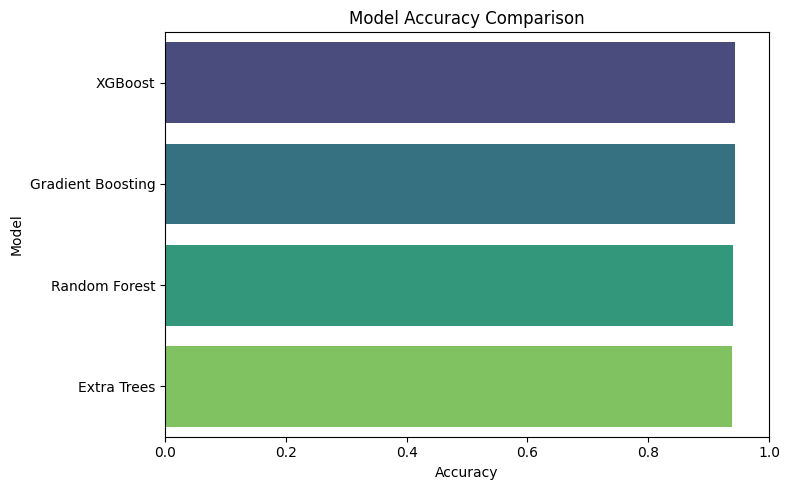

In [33]:
#  accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='ACCURACY', y='MODEL', data=results_df.sort_values(by='ACCURACY', ascending=False), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1787/590678839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ACCURACY', y='MODEL', data=results_df, palette='crest')


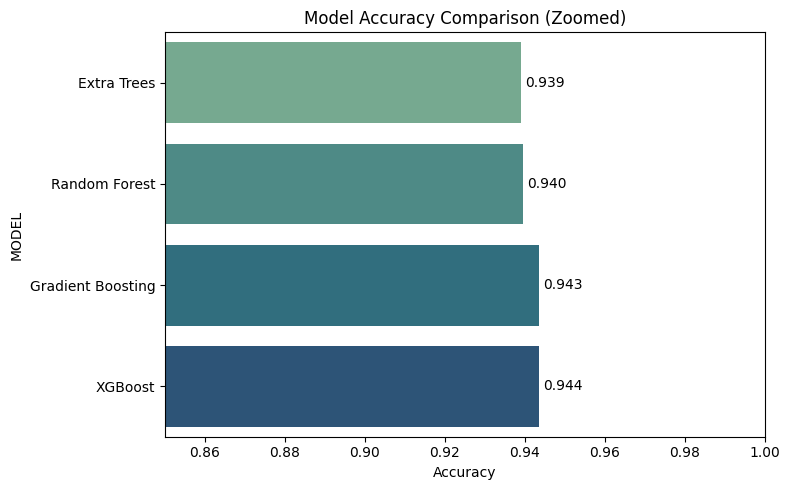

In [35]:
# sort models by accuracy
results_df = results_df.sort_values(by='ACCURACY', ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(x='ACCURACY', y='MODEL', data=results_df, palette='crest')
for i, (acc, model) in enumerate(zip(results_df['ACCURACY'], results_df['MODEL'])):
    plt.text(acc + 0.001, i, f"{acc:.3f}", va='center')
plt.title("Model Accuracy Comparison (Zoomed)")
plt.xlabel("Accuracy")
plt.xlim(0.85, 1.0)  # zoom in 
plt.tight_layout()
plt.show()

In [36]:
# initialize results list
metrics = {
    'MODEL': [],
    'ACCURACY': [],
    'PRECISION': [],
    'RECALL': [],
      'F1-SCORE': [],
    'AUC': []
}

# loop through each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # needed for AUC

    metrics['MODEL'].append(name)
    metrics['ACCURACY'].append(accuracy_score(y_test, y_pred))
    metrics['PRECISION'].append(precision_score(y_test, y_pred))
    metrics['RECALL'].append(recall_score(y_test, y_pred))
    metrics['F1-SCORE'].append(f1_score(y_test, y_pred))
    metrics['AUC'].append(roc_auc_score(y_test, y_proba))

# convert to DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df

/opt/anaconda3/envs/py312_pjt/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:27:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,MODEL,ACCURACY,PRECISION,RECALL,F1-SCORE,AUC
0,Random Forest,0.939659,0.844573,0.845208,0.844890,0.983971
1,Extra Trees,0.938976,0.841790,0.844957,0.843370,0.979623
2,XGBoost,0.943512,0.853147,0.856999,0.855069,0.985105
3,Gradient Boosting,0.943463,0.855956,0.852735,0.854342,0.984949


/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_9475/2292948589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1-SCORE', y='MODEL', data=metrics_df.sort_values(by='F1-SCORE'), palette='flare')


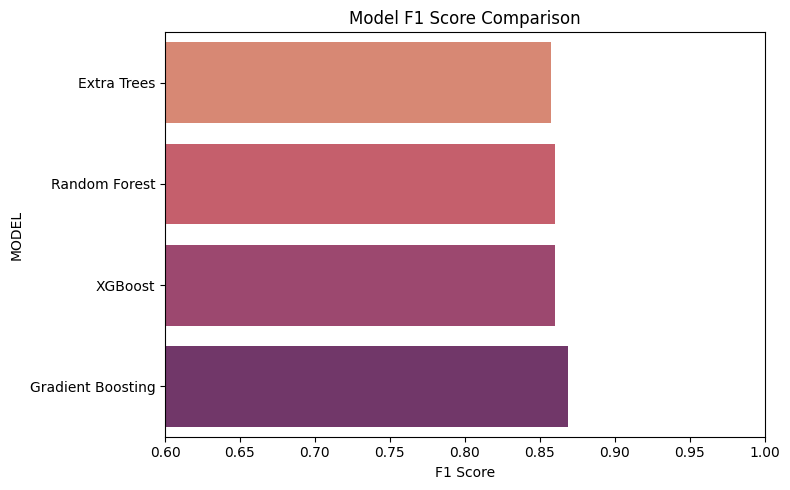

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='F1-SCORE', y='MODEL', data=metrics_df.sort_values(by='F1-SCORE'), palette='flare')
plt.title("Model F1 Score Comparison")
plt.xlabel("F1 Score")
plt.xlim(0.6, 1.0)
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/py312_pjt/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:12:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


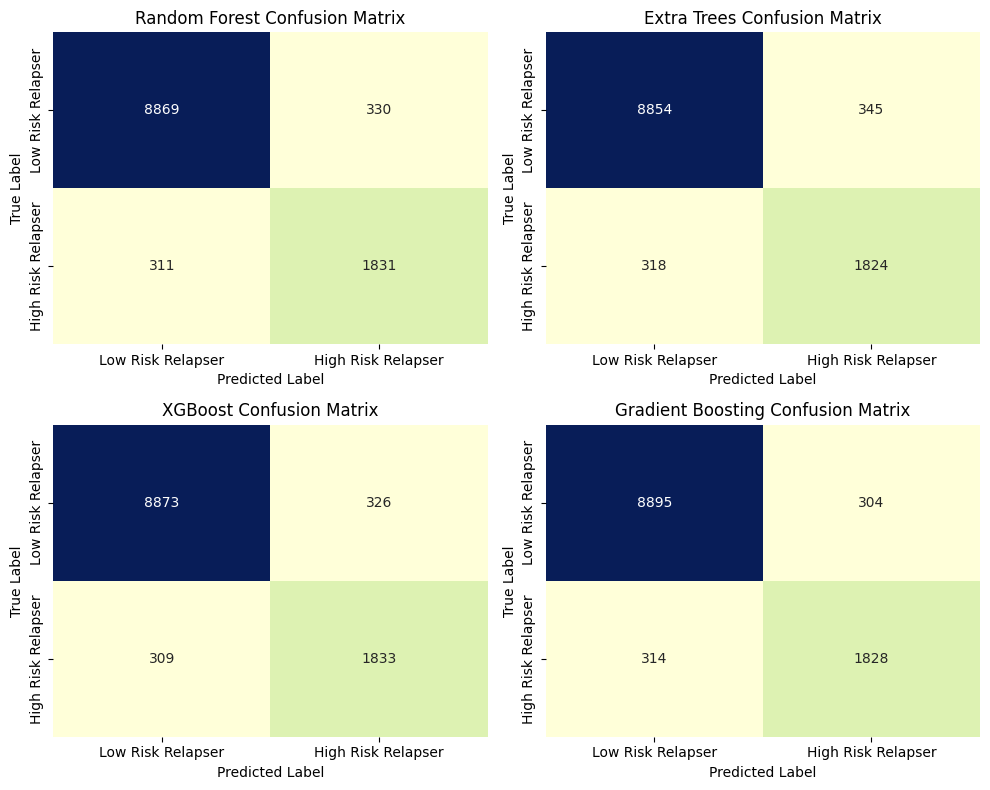

In [ ]:

# confusion matrix for each model
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[i], cbar=False,
                xticklabels=["Low Risk Relapser", "High Risk Relapser"],
                yticklabels=["Low Risk Relapser", "High Risk Relapser"])
    
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [ ]:
### ---- End ----

In [ ]:
# compare with clustering result